In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Rows = input text
# Columns = labels

# Eto ay may apat na sample hate speech post na may 6 labels 
# ang y_pred ay nakuha pagkatapos mag-apply ng sigmoid sa logits (raw predictions) na may 0.5 threshold

y_pred = np.array([
    [0, 1, 1, 0, 0, 1],
    [1, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 1, 0]
])

y_true = np.array([
    [0, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 0],
    [0, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 0]
])

# Confusion matrix per row

from sklearn.metrics import confusion_matrix

def calculate_confusion_matrix(y_true_row, y_pred_row):

    # Etong cm ay nagrereturn ng array na may 2 rows and 2 columns na nagrerepresent ng TP, FP, TN, FN
    cm = confusion_matrix(y_true_row, y_pred_row)

    TP = cm[1, 1]  # True Positives -  bottom right
    FP = cm[0, 1]  # False Positives -  bottom left
    TN = cm[0, 0]  # True Negatives -  top right
    FN = cm[1, 0]  # False Negatives -  top left
    return TP, FP, TN, FN

# Example usage:
y_true_row = np.array([0, 1, 0, 1, 0, 1])
y_pred_row = np.array([0, 1, 1, 0, 0, 1])

TP, FP, TN, FN = calculate_confusion_matrix(y_true_row, y_pred_row)
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 2
False Positives (FP): 1
True Negatives (TN): 2
False Negatives (FN): 1


In [ ]:
# Rows = input text
# Columns = labels
# Eto ay may sampung sample hate speech post na may 6 labels 
# ang y_pred ay nakuha pagkatapos mag-apply ng sigmoid sa logits (raw predictions) na may 0.5 threshold

y_pred = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1, 0],
    [1, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1],
    [0, 1, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0]
])

# Next step ay gamitin pandas para kunin ang y_true np.array mula sa eval_data frame
y_true = np.array([
    [1, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1, 1],
    [1, 1, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 1, 0],
    [1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 1]
])

In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

test_path = './dataset/test-try2.csv'
test_df = pd.read_csv(test_path)
labels = ['Age', 'Gender', 'Physical', 'Race', 'Religion', 'Others']

N_LABELS = 6
N_EVAL_ROWS = test_df.shape[0]

predictions = np.random.uniform(-38, 38, (N_EVAL_ROWS, N_LABELS))
print(predictions.shape)


y_true = test_df[labels].to_numpy()
print(y_true.shape)

confusion_matrix = multilabel_confusion_matrix(y_true, y_pred)

print(confusion_matrix)

def plot_confusion_matrix(cm, labels, num_rows, num_columns):
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

    for i, ax in enumerate(axes.flatten()):
        ax.matshow(cm[i], cmap='Blues')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(['0', '1'])
        ax.set_yticklabels(['0', '1'])
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(labels[i])

        for x in range(2):
            for y in range(2):
                ax.text(x, y, str(cm[i][y, x]), va='center', ha='center', color='black', fontsize=16)

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(confusion_matrix, labels, num_rows=2, num_columns=3)


Para makuha ang metrics, kailangan ko ng confusion_matrix,

Para makuha ang cm, kailangan ng y_true at y_preds

In [367]:
import torch
import numpy as np
from transformers import EvalPrediction


3.0317460317460316


In [380]:

import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

def multilabel_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probabilities = sigmoid(torch.Tensor(predictions))

    y_pred = np.zeros(probabilities.shape)
    y_pred[np.where(probabilities >= threshold)] = 1
    y_true = labels

    confusion_matrix = multilabel_confusion_matrix(y_true, y_pred)
    label_metrics = {}
    
    classes = ['Age', 'Gender', 'Physical', 'Race', 'Religion', 'Others']

    for i in range(confusion_matrix.shape[0]):
        TP = confusion_matrix[i, 1, 1]  # True Positives
        FP = confusion_matrix[i, 0, 1]  # False Positives
        FN = confusion_matrix[i, 1, 0]  # False Negatives
        TN = confusion_matrix[i, 0, 0]  # True Negatives

        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

        label_name = classes[i]

        label_metrics[label_name] = {
            "Precision": f"{precision * 100:.2f}%",
            "Recall": f"{recall * 100:.2f}%",
            "F1-Score": f"{f1_score * 100:.2f}%"
        }

    # Calculate Hamming Loss
    xor_result = np.logical_xor(y_true, y_pred)
    xor_sum = np.sum(xor_result)
    hamming_loss = xor_sum / (y_true.shape[0] * y_true.shape[1])
    
    label_metrics['Hamming Loss'] = f"{hamming_loss:.4f}"

    return label_metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    result = multilabel_metrics(predictions=preds, labels=p.label_ids, threshold=0.5)
    return result

In [381]:
compute_metrics(p)

{'Age': {'Precision': '18.15%', 'Recall': '47.90%', 'F1-Score': '26.33%'},
 'Gender': {'Precision': '18.12%', 'Recall': '46.03%', 'F1-Score': '26.01%'},
 'Physical': {'Precision': '24.32%', 'Recall': '44.65%', 'F1-Score': '31.49%'},
 'Race': {'Precision': '22.15%', 'Recall': '54.55%', 'F1-Score': '31.51%'},
 'Religion': {'Precision': '20.39%', 'Recall': '49.21%', 'F1-Score': '28.84%'},
 'Others': {'Precision': '14.75%', 'Recall': '53.19%', 'F1-Score': '23.09%'},
 'Hamming Loss': '0.5053'}

In [288]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


y_pred = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 1, 0],
    [1, 1, 1, 0, 1, 0],
])



# Next step ay gamitin pandas para kunin ang y_true np.array mula sa eval_data frame
y_true = np.array([
    [1, 1, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0],
])

confusion_matrix = multilabel_confusion_matrix(y_true, y_pred)
print(confusion_matrix)


[[[1 1]
  [3 1]]

 [[0 2]
  [1 3]]

 [[1 2]
  [3 0]]

 [[0 2]
  [2 2]]

 [[1 4]
  [0 1]]

 [[3 1]
  [2 0]]]


Must return


- Metrics: PRF, Hamming Loss


def multilabel_metrics(predictions, true_labels, threshold: int =0.5):

    return metrics


In [113]:
y_true = np.array([
    [1, 1, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 0],
    [1, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0],
])


print(y_true)
print(y_true.shape)

[[1 1 0 1 0 0]
 [1 1 0 1 0 0]
 [1 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [1 1 1 0 0 1]
 [1 1 1 0 0 1]
 [1 1 1 0 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]]
(10, 6)


In [302]:
num_samples = N_EVAL_ROWS
num_labels = N_LABELS

predictions = np.random.uniform(-38, 38, (num_samples, num_labels))

print("Predicitions")
print(predictions)
print(predictions.shape)

Predicitions
[[ 36.76394377 -11.2780596  -17.00344448 -23.60995822  -1.44778854
   36.20338883]
 [  4.55718364 -31.36686499   4.64309762  -6.17864791   8.15427192
  -16.25556935]
 [-29.94575541 -23.49364925  24.61389717  -8.30342686 -30.20718853
  -22.90818999]
 ...
 [-16.14549    -37.49444253 -36.7562983  -11.97062121 -12.3325491
    7.20520112]
 [ 21.89433817  13.06478369 -10.75057288  22.53426531  28.21542574
   28.6772388 ]
 [-24.25228387 -21.92554951 -36.08316946 -33.54989715 -12.32342464
  -31.87441034]]
(630, 6)


In [319]:
from transformers import EvalPrediction
p = EvalPrediction(predictions, label_ids=y_true)

preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

print("preds")
print(preds)



preds
[[ 36.76394377 -11.2780596  -17.00344448 -23.60995822  -1.44778854
   36.20338883]
 [  4.55718364 -31.36686499   4.64309762  -6.17864791   8.15427192
  -16.25556935]
 [-29.94575541 -23.49364925  24.61389717  -8.30342686 -30.20718853
  -22.90818999]
 ...
 [-16.14549    -37.49444253 -36.7562983  -11.97062121 -12.3325491
    7.20520112]
 [ 21.89433817  13.06478369 -10.75057288  22.53426531  28.21542574
   28.6772388 ]
 [-24.25228387 -21.92554951 -36.08316946 -33.54989715 -12.32342464
  -31.87441034]]


In [329]:
compute_metrics(p)

TypeError: unhashable type: 'list'

In [304]:
import torch

threshold = 0.5

sigmoid = torch.nn.Sigmoid()
probabilities = sigmoid(torch.Tensor(preds))
print("Probabilities: ")
print(probabilities)

y_pred = np.zeros(probabilities.shape)
y_pred[np.where(probabilities >= threshold)] = 1

print("Predictions: ")
print(y_pred)



Probabilities: 
tensor([[1.0000e+00, 1.2647e-05, 4.1257e-08, 5.5760e-11, 1.9034e-01, 1.0000e+00],
        [9.8962e-01, 2.3853e-14, 9.9046e-01, 2.0689e-03, 9.9971e-01, 8.7156e-08],
        [9.8792e-14, 6.2638e-11, 1.0000e+00, 2.4761e-04, 7.6065e-14, 1.1249e-10],
        ...,
        [9.7298e-08, 5.2044e-17, 1.0888e-16, 6.3274e-06, 4.4060e-06, 9.9926e-01],
        [1.0000e+00, 1.0000e+00, 2.1433e-05, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.9334e-11, 3.0051e-10, 2.1344e-16, 2.6882e-15, 4.4463e-06, 1.4359e-14]])
Predictions: 
[[1. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0.]]


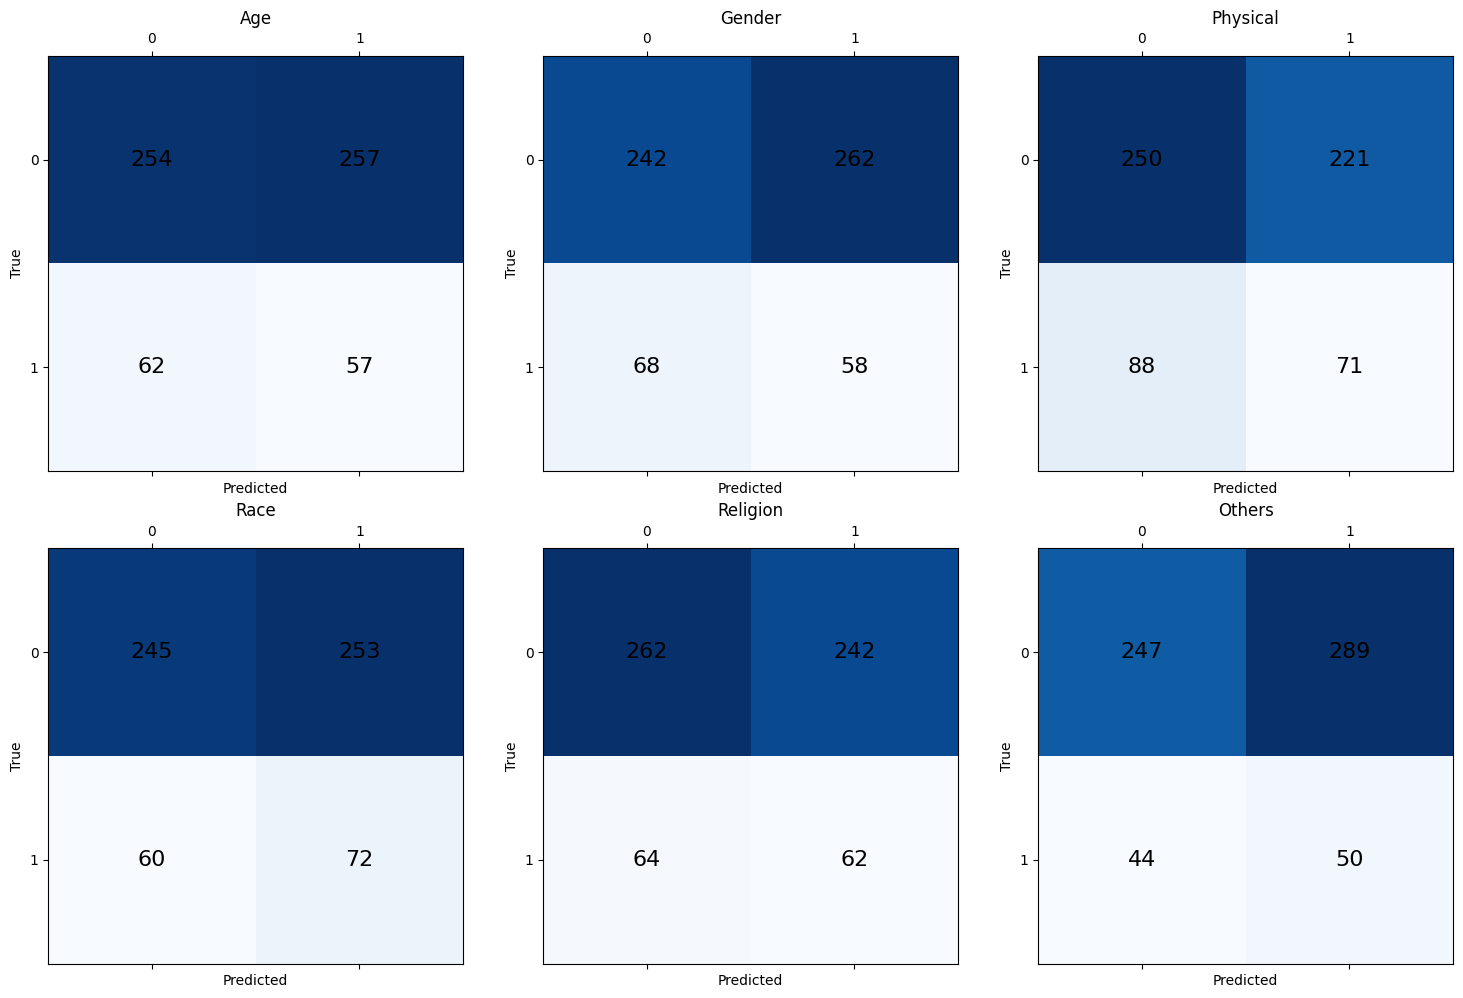

In [305]:
confusion_matrix = multilabel_confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_matrix, labels, num_rows=2, num_columns=3)

In [310]:
multilabel_metrics(confusion_matrix, labels=labels)

{'Age': {'Precision': '18.15%', 'Recall': '47.90%', 'F1-Score': '26.33%'},
 'Gender': {'Precision': '18.12%', 'Recall': '46.03%', 'F1-Score': '26.01%'},
 'Physical': {'Precision': '24.32%', 'Recall': '44.65%', 'F1-Score': '31.49%'},
 'Race': {'Precision': '22.15%', 'Recall': '54.55%', 'F1-Score': '31.51%'},
 'Religion': {'Precision': '20.39%', 'Recall': '49.21%', 'F1-Score': '28.84%'},
 'Others': {'Precision': '14.75%', 'Recall': '53.19%', 'F1-Score': '23.09%'},
 'Hamming Loss': '25.00%'}

In [ ]:
{
    input_ids: [101, 203293, 26732, ... , 102, 0 , ... 0],
    attention_mask: [1, 1, 1, 1, ..., 1 ... , 0, 0, 0, ...],
    labels: [1., 0., 1., 0., 0., 0.]
}